In [1]:
# importing standard libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("/Users/Tejas/csv_files/breast_cancer_data/Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [2]:
# brief description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [3]:
# shape of the data
df.shape

(569, 6)

In [4]:
# looking at the number of missing values
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [5]:
# features relationships with the target
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis          1.000000
mean_smoothness   -0.358560
mean_texture      -0.415185
mean_area         -0.708984
mean_radius       -0.730029
mean_perimeter    -0.742636
Name: diagnosis, dtype: float64

In [6]:
# creating mutual info scores
X = df.copy()
y = X.pop('diagnosis')

discrete_features = X.dtypes == int
discrete_features

mean_radius        False
mean_texture       False
mean_perimeter     False
mean_area          False
mean_smoothness    False
dtype: bool

In [7]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='mi_scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

make_mi_scores(X, y, discrete_features)

mean_perimeter     0.404519
mean_radius        0.370529
mean_area          0.363130
mean_texture       0.100194
mean_smoothness    0.083930
Name: mi_scores, dtype: float64

In [8]:
# creating clusters with KMeans
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=6)
X['cluster'] = kmeans.fit_predict(X)
X['cluster'] = X['cluster'].astype('category')

X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,cluster
0,17.99,10.38,122.80,1001.0,0.11840,5
1,20.57,17.77,132.90,1326.0,0.08474,1
2,19.69,21.25,130.00,1203.0,0.10960,1
3,11.42,20.38,77.58,386.1,0.14250,2
4,20.29,14.34,135.10,1297.0,0.10030,1


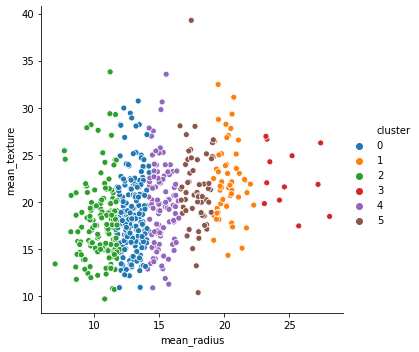

In [10]:
# visualizing cluster impact on features
sns.relplot(x='mean_radius', y='mean_texture', hue='cluster', data=X, height=5)
plt.show()

In [11]:
# scaling data for PCA
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.iloc[:, :-1]), columns=X.columns[:-1])
X_droped = X.drop(X.columns[:-1], axis=1)
X_scaled = pd.concat([X_scaled, X_droped], axis=1)
X_scaled

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,cluster
0,0.521037,0.022658,0.545989,0.363733,0.593753,5
1,0.643144,0.272574,0.615783,0.501591,0.289880,1
2,0.601496,0.390260,0.595743,0.449417,0.514309,1
3,0.210090,0.360839,0.233501,0.102906,0.811321,2
4,0.629893,0.156578,0.630986,0.489290,0.430351,1
...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,1
565,0.622320,0.626987,0.604036,0.474019,0.407782,1
566,0.455251,0.621238,0.445788,0.303118,0.288165,5
567,0.644564,0.663510,0.665538,0.475716,0.588336,1


In [13]:
# Applying PCA
from sklearn.decomposition import PCA

In [14]:
pca = PCA()

X_pca = pca.fit_transform(X_scaled.iloc[:, :-1])

component_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca

X_scaled = pd.concat([X_scaled, X_pca], axis=1)
X_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,cluster,PC1,PC2,PC3,PC4,PC5
0,0.521037,0.022658,0.545989,0.363733,0.593753,5,0.261611,-0.401720,-0.006746,-0.024422,0.016742
1,0.643144,0.272574,0.615783,0.501591,0.289880,1,0.468230,-0.072510,-0.206749,0.017864,-0.010151
2,0.601496,0.390260,0.595743,0.449417,0.514309,1,0.452193,-0.060271,0.054644,0.000210,-0.004461
3,0.210090,0.360839,0.233501,0.102906,0.811321,2,-0.143175,-0.125743,0.421671,-0.005463,0.004370
4,0.629893,0.156578,0.630986,0.489290,0.430351,1,0.451996,-0.237213,-0.129287,0.007580,0.005614


In [15]:
# Looking at component loadings 
loadings = pd.DataFrame(pca.components_.T, columns=[col + '_loadings' for col in component_names],
                        index=X_scaled.iloc[:, :5].columns)
loadings

,PC1_loadings,PC2_loadings,PC3_loadings,PC4_loadings,PC5_loadings
mean_radius,0.579910,-0.082788,-0.128991,-0.364497,-0.712288
mean_texture,0.212876,0.880922,0.422571,0.005131,-0.008226
mean_perimeter,0.585001,-0.095200,-0.077873,-0.389411,0.700718
mean_area,0.516511,-0.078029,-0.107489,0.845760,0.016255
mean_smoothness,0.096844,-0.449412,0.887230,0.012849,-0.036168


In [16]:
make_mi_scores(X_pca, y, discrete_features=False)

PC1    0.431116
PC5    0.062588
PC4    0.027761
PC3    0.014632
PC2    0.000000
Name: mi_scores, dtype: float64

In [17]:
# Creating new features using mathematical transformations
X_scaled['RA_ratio'] = X_scaled.mean_radius / X_scaled.mean_area

In [18]:
X_scaled.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
cluster            0
PC1                0
PC2                0
PC3                0
PC4                0
PC5                0
RA_ratio           1
dtype: int64

In [19]:
X_scaled['RA_ratio'] = X_scaled['RA_ratio'].fillna(X_scaled['RA_ratio'].mean())

In [20]:
X_scaled['PA_ratio'] = X_scaled['mean_perimeter'] / X_scaled['mean_area']
X_scaled['PA_ratio'] = X_scaled['PA_ratio'].fillna(X_scaled['PA_ratio'].mean())

In [21]:
X_scaled['perimeter_mul_area'] = X_scaled['mean_perimeter'] * X_scaled['mean_area']
X_scaled['perimeter_mul_area'] = X_scaled['perimeter_mul_area'].fillna(X_scaled['perimeter_mul_area'].mean())

In [22]:
X_scaled['radius_mul_area'] = X_scaled['mean_radius'] * X_scaled['mean_area']
X_scaled['radius_mul_area'] = X_scaled['radius_mul_area'].fillna(X_scaled['radius_mul_area'].mean())

In [23]:
make_mi_scores(X_scaled, y, discrete_features=False)

PC1                   0.431116
mean_perimeter        0.402129
RA_ratio              0.386516
cluster               0.380849
mean_radius           0.369566
perimeter_mul_area    0.367313
mean_area             0.360536
radius_mul_area       0.340424
PA_ratio              0.307496
mean_texture          0.100055
mean_smoothness       0.082835
PC5                   0.063045
PC4                   0.027761
PC3                   0.014632
PC2                   0.000000
Name: mi_scores, dtype: float64

In [24]:
# selecting best features
best_features = list(make_mi_scores(X_scaled, y, discrete_features=False).index)[:-1]

In [25]:
# creating model
from sklearn.ensemble import RandomForestClassifier

In [26]:
X_scaled = X_scaled[best_features]

In [27]:
from sklearn.model_selection import cross_val_score, train_test_split

In [28]:
# calculating cross val score
forest = RandomForestClassifier(random_state=42)
scores = cross_val_score(forest, X_scaled, y, cv=10, scoring='roc_auc')
scores

array([0.9961039 , 0.94415584, 0.96825397, 0.95833333, 1.        ,
       0.98478836, 0.98941799, 0.99140212, 0.99867725, 0.98503401])

In [29]:
scores.mean()

0.9816166769738197

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, train_size=.8, random_state=42)

In [31]:
X_train

,PC1,mean_perimeter,RA_ratio,perimeter_mul_area,mean_radius,mean_area,cluster,radius_mul_area,PA_ratio,mean_texture,mean_smoothness,PC5,PC4,PC3
68,-0.367811,0.103656,2.135595,0.004705,0.096928,0.045387,2,0.004399,2.283814,0.257694,0.487226,0.005624,0.033007,0.121430
181,0.607854,0.683505,1.348379,0.338491,0.667755,0.495228,1,0.330691,1.380182,0.570172,0.554934,0.007635,-0.017927,0.146407
63,-0.410599,0.106489,2.083268,0.005303,0.103744,0.049799,2,0.005166,2.138394,0.140345,0.221901,0.013388,0.029139,-0.165136
248,-0.216874,0.167369,2.011667,0.014447,0.173648,0.086320,2,0.014989,1.938933,0.524518,0.396678,-0.002632,0.015057,0.134587
60,-0.311450,0.143459,2.112930,0.010248,0.150930,0.071432,2,0.010781,2.008345,0.174839,0.548614,-0.006065,0.020214,0.128019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.400138,0.103656,2.117178,0.004419,0.090255,0.042630,2,0.003848,2.431523,0.166723,0.408053,0.013944,0.031623,0.013901
106,-0.180595,0.216847,1.932472,0.024743,0.220503,0.114104,2,0.025160,1.900438,0.291512,0.555836,-0.004724,0.003059,0.164453
270,-0.052982,0.321401,1.667374,0.066680,0.345923,0.207466,4,0.071767,1.549180,0.240446,0.105263,-0.002562,-0.010461,-0.291243
435,-0.008804,0.327068,1.712553,0.063263,0.331251,0.193425,0,0.064072,1.690927,0.335137,0.481809,-0.002767,-0.013870,0.085813


In [32]:
# testing again using train and validation set
from sklearn.metrics import roc_auc_score

In [33]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
preds = forest.predict(X_val)
forest_roc_auc = roc_auc_score(y_val, preds)
forest_roc_auc

0.9485751719620047